In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

file_1 = "Resources/1_county_data.csv"
file_2 = "Resources/2_directory.csv"
file_3 = "Resources/4_zip_codes_us_only.csv"

In [3]:
df_1 = pd.read_csv(file_1)
df_2 = pd.read_csv(file_2)
df_3 = pd.read_csv(file_3)

In [4]:
clean_df_1 = df_1[["State", "TotalPop", "WorkAtHome", "Employed","Unemployment"]].copy()
GrBy_Sum = clean_df_1.groupby("State").sum()
Avg_By = clean_df_1.groupby("State").mean()

clean_df_1 = pd.DataFrame({
    "TotalPop" : GrBy_Sum["TotalPop"],
    "WorkAtHome" : Avg_By["WorkAtHome"],
    "Employed" : (GrBy_Sum["Employed"] / GrBy_Sum["TotalPop"])*100,
    "Unemployment" : Avg_By["Unemployment"],
}).reset_index()
clean_df_1

,State,TotalPop,WorkAtHome,Employed,Unemployment
0,Alabama,4850771,2.528358,42.374893,9.023881
1,Alaska,738565,5.455172,47.936878,9.655172
2,Arizona,6809946,5.033333,43.376130,9.766667
3,Arkansas,2977944,3.250667,42.866353,7.292000
4,California,38982847,6.668966,46.158545,8.265517
5,Colorado,5436519,8.025000,50.769178,5.793750
6,Connecticut,3594478,4.862500,50.218307,6.775000
7,Delaware,943732,4.666667,46.783727,6.433333
8,District of Columbia,672391,5.700000,53.198362,8.000000
9,Florida,20278447,5.008955,44.473672,7.765672


In [5]:
clean_df_2 = df_2[["Store Number", "State/Province", "Country", "Longitude","Latitude"]].copy()
clean_df_2 = clean_df_2.loc[clean_df_2["Country"]=="US"].drop(columns="Country")
clean_df_2

,Store Number,State/Province,Longitude,Latitude
11964,3513-125945,AK,-149.78,61.21
11965,74352-84449,AK,-149.84,61.14
11966,12449-152385,AK,-149.85,61.11
11967,24936-233524,AK,-149.89,61.13
11968,8973-85630,AK,-149.86,61.14
...,...,...,...,...
25567,74385-87621,WY,-105.59,41.32
25568,73320-24375,WY,-105.56,41.31
25569,22425-219024,WY,-105.56,41.31
25570,10849-103163,WY,-109.25,41.58


In [6]:
clean_df_2.rename(columns={"State/Province": "state_id"},inplace=True)
clean_df_2

,Store Number,state_id,Longitude,Latitude
11964,3513-125945,AK,-149.78,61.21
11965,74352-84449,AK,-149.84,61.14
11966,12449-152385,AK,-149.85,61.11
11967,24936-233524,AK,-149.89,61.13
11968,8973-85630,AK,-149.86,61.14
...,...,...,...,...
25567,74385-87621,WY,-105.59,41.32
25568,73320-24375,WY,-105.56,41.31
25569,22425-219024,WY,-105.56,41.31
25570,10849-103163,WY,-109.25,41.58


In [7]:
df_3.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,1001,42.06258,-72.62590,Agawam,MA,Massachusetts,True,NaN,17621,562.8,25013,Hampden,{'25013':100},Hampden,25013,False,False,America/New_York
1,1002,42.37492,-72.46210,Amherst,MA,Massachusetts,True,NaN,30066,203.7,25015,Hampshire,"{'25011':0.97,'25015':99.03}",Hampshire|Franklin,25015|25011,False,False,America/New_York
2,1003,42.39192,-72.52479,Amherst,MA,Massachusetts,True,NaN,11238,5629.7,25015,Hampshire,{'25015':100},Hampshire,25015,False,False,America/New_York
3,1005,42.42018,-72.10615,Barre,MA,Massachusetts,True,NaN,4991,44.3,25027,Worcester,{'25027':100},Worcester,25027,False,False,America/New_York
4,1007,42.27875,-72.40036,Belchertown,MA,Massachusetts,True,NaN,14967,107.5,25015,Hampshire,{'25015':100},Hampshire,25015,False,False,America/New_York


In [8]:
zip_gr = df_3.groupby(["state_id","state_name"]).count()["zip"]
state_df = pd.DataFrame(zip_gr).reset_index().drop(columns="zip")
state_df.rename(columns={"state_name": "State"},inplace=True)
state_df

,state_id,State
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas
3,AZ,Arizona
4,CA,California
5,CO,Colorado
6,CT,Connecticut
7,DE,Delaware
8,FL,Florida
9,GA,Georgia


In [9]:
merge_df = state_df.merge(clean_df_1, on="State", how="left")
merge_df

,state_id,State,TotalPop,WorkAtHome,Employed,Unemployment
0,AK,Alaska,738565,5.455172,47.936878,9.655172
1,AL,Alabama,4850771,2.528358,42.374893,9.023881
2,AR,Arkansas,2977944,3.250667,42.866353,7.292000
3,AZ,Arizona,6809946,5.033333,43.376130,9.766667
4,CA,California,38982847,6.668966,46.158545,8.265517
5,CO,Colorado,5436519,8.025000,50.769178,5.793750
6,CT,Connecticut,3594478,4.862500,50.218307,6.775000
7,DE,Delaware,943732,4.666667,46.783727,6.433333
8,FL,Florida,20278447,5.008955,44.473672,7.765672
9,GA,Georgia,10201635,3.611321,45.152850,8.053459


In [10]:
final_df = clean_df_2.merge(merge_df, on="state_id", how="left")
final_df

,Store Number,state_id,Longitude,Latitude,State,TotalPop,WorkAtHome,Employed,Unemployment
0,3513-125945,AK,-149.78,61.21,Alaska,738565.0,5.455172,47.936878,9.655172
1,74352-84449,AK,-149.84,61.14,Alaska,738565.0,5.455172,47.936878,9.655172
2,12449-152385,AK,-149.85,61.11,Alaska,738565.0,5.455172,47.936878,9.655172
3,24936-233524,AK,-149.89,61.13,Alaska,738565.0,5.455172,47.936878,9.655172
4,8973-85630,AK,-149.86,61.14,Alaska,738565.0,5.455172,47.936878,9.655172
...,...,...,...,...,...,...,...,...,...
13603,74385-87621,WY,-105.59,41.32,Wyoming,583200.0,5.860870,50.348594,4.282609
13604,73320-24375,WY,-105.56,41.31,Wyoming,583200.0,5.860870,50.348594,4.282609
13605,22425-219024,WY,-105.56,41.31,Wyoming,583200.0,5.860870,50.348594,4.282609
13606,10849-103163,WY,-109.25,41.58,Wyoming,583200.0,5.860870,50.348594,4.282609


In [11]:
store_count = final_df.groupby("State").count()["Store Number"]
store_count

State
Alabama             85
Alaska              49
Arizona            488
Arkansas            55
California        2821
Colorado           481
Connecticut        123
Delaware            25
Florida            694
Georgia            326
Hawaii              99
Idaho               67
Illinois           575
Indiana            221
Iowa                89
Kansas              94
Kentucky           116
Louisiana           84
Maine               30
Maryland           257
Massachusetts      273
Michigan           283
Minnesota          184
Mississippi         32
Missouri           188
Montana             36
Nebraska            58
Nevada             253
New Hampshire       29
New Jersey         261
New Mexico          76
New York           645
North Carolina     338
North Dakota        13
Ohio               378
Oklahoma            79
Oregon             359
Pennsylvania       357
Rhode Island        27
South Carolina     131
South Dakota        25
Tennessee          180
Texas             1042
Utah 

In [18]:
#Create a dataframe grouping by state group
state_group = final_df.groupby('State')

#Dataframe to count the number of Starbucks number
store_number = pd.DataFrame(state_group['Store Number'].count())


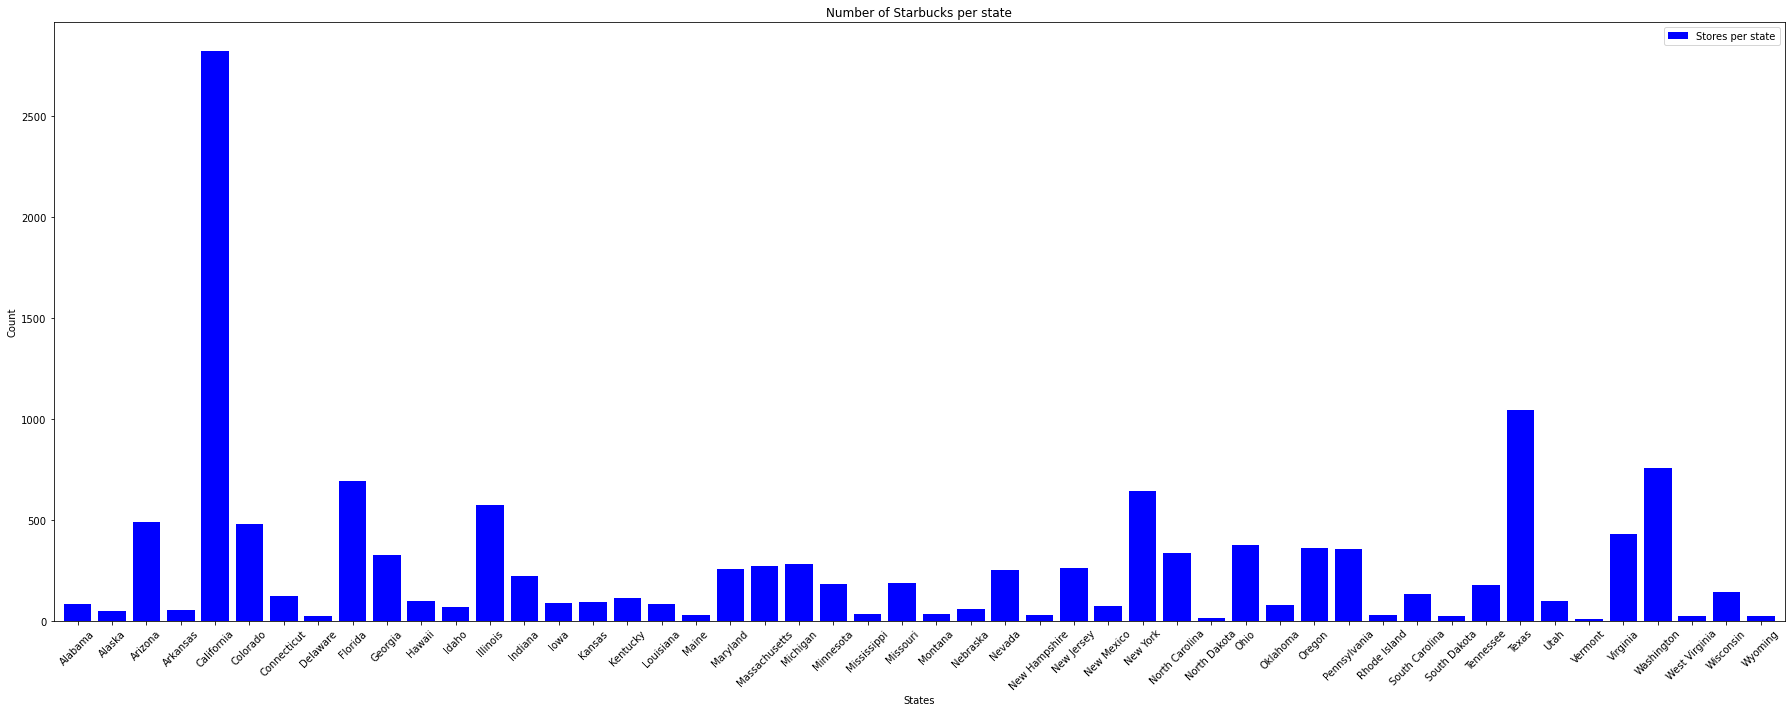

In [35]:
#Set x axis and tick locations
x_axis = np.arange(len(store_number))
width = 0.40
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(25,10))
plt.bar(x_axis, store_number["Store Number"], color='b', alpha=1, align="center")
plt.xticks(tick_locations, list(store_number.index), rotation=45)

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(store_number["Store Number"])*1.05)

#Set a Title and labels
plt.title("Number of Starbucks per state")
plt.xlabel("States")
plt.ylabel("Count")

#Create a legend
legend_name = ["Stores per state"]
plt.legend(legend_name,loc="best")


# Save the figure
plt.tight_layout()
plt.savefig("images/stores_per_state.png")
plt.show()

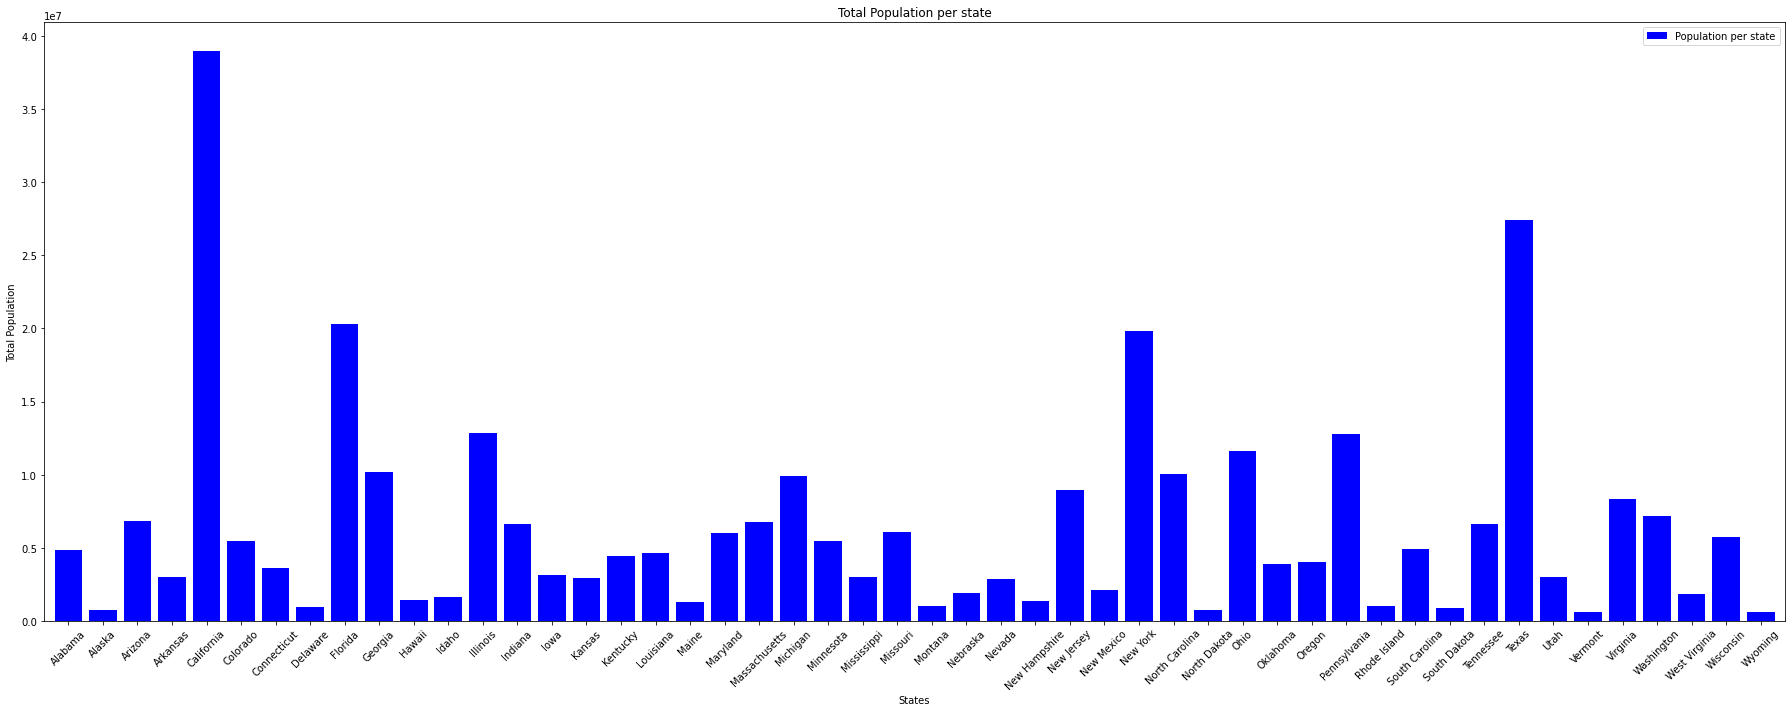

In [41]:
#Create a dataframe grouping by state group
state_group = merge_df.groupby('State')

#Dataframe to count the number of total population
population_df = pd.DataFrame(state_group['TotalPop'].sum())



x_axis = np.arange(len(population_df))
width = 0.40
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(25,10))
plt.bar(x_axis, population_df["TotalPop"], color='b', alpha=1, align="center")
plt.xticks(tick_locations, list(population_df.index), rotation=45)

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(population_df["TotalPop"])*1.05)

#Set a Title and labels
plt.title("Total Population per state")
plt.xlabel("States")
plt.ylabel("Total Population")

#Create a legend
legend_name = ["Population per state"]
plt.legend(legend_name,loc="best")


# Save the figure
plt.tight_layout()
plt.savefig("images/population_per_state.png")
plt.show()